In [63]:
import puff_lib
import pandas as pd
import numpy as np
import os
import pims
import trackpy as tp

In [19]:
movie = '/Volumes/Coatamer/Users/weinberz/UM Drive/OPP/6SG3YVW7.tif'
markers =  '/Volumes/Coatamer/Users/weinberz/UM Drive/OPP/6SG3YVW7-ZYW-1.xml'
num_pad = 5
delta = 4
f = pims.TiffStack(movie)
marker_locs = puff_lib.import_xml_data(markers)

In [22]:
def report_performance(events, puff_ids):
    num_puffs = len(np.unique(puff_ids))
    missing_puffs = np.sum(puff_ids<0)
    num_events = len(np.unique(events['particle']))
    puff_freq = num_puffs/num_events
    print('%d/%d missing puffs in %d events (%.5f freq)' % (missing_puffs, num_puffs, num_events, puff_freq))

In [23]:
# For Ciaran's default params
events = pd.read_csv('data/6SG3YVW7.tif_events.csv',usecols=[1,2,3,4], names=['frame','x','y','particle'], header=0)
puff_ids = np.array([puff_lib.filter_df(events, m, 5) for m in marker_locs])
report_performance(events, puff_ids)

49/520 missing puffs in 38728 events (0.01343 freq)


In [69]:
locs = puff_lib.find_locs(f, cutoff=0.9, min_sigma = 1, max_sigma = 5, num_sigma=3)
events = tp.link_df(locs, search_range=3, memory=0)
events = tp.filter_stubs(events, 4)
puff_ids = np.array([puff_lib.filter_df(events, m, 5) for m in marker_locs])
report_performance(events, puff_ids)

Frame 2999: 373 trajectories present.
42/526 missing puffs in 39044 events (0.01347 freq)


In [25]:
# for changing sigma to focus on slightly larger events
locs = puff_lib.find_locs(f, cutoff=0.9, min_sigma = 2, max_sigma = 5)
events = tp.link_df(locs, search_range=3, memory=0)
events = tp.filter_stubs(events, 4)
puff_ids = np.array([puff_lib.filter_df(events, m, 5) for m in marker_locs])
report_performance(events, puff_ids)

Frame 2999: 128 trajectories present.
77/490 missing puffs in 17543 events (0.02793 freq)


In [26]:
# for more restrictive cutoff
locs = puff_lib.find_locs(f, cutoff=0.95, max_sigma = 3)
events = tp.link_df(locs, search_range=3, memory=0)
events = tp.filter_stubs(events, 4)
puff_ids = np.array([puff_lib.filter_df(events, m, 5) for m in marker_locs])
report_performance(events, puff_ids)

Frame 2999: 239 trajectories present.
96/475 missing puffs in 30485 events (0.01558 freq)


In [27]:
# for more restrictive cutoff
locs = puff_lib.find_locs(f, cutoff=0.9, min_sigma=1.5, max_sigma = 3)
events = tp.link_df(locs, search_range=3, memory=0)
events = tp.filter_stubs(events, 4)
puff_ids = np.array([puff_lib.filter_df(events, m, 5) for m in marker_locs])
report_performance(events, puff_ids)

Frame 2999: 219 trajectories present.
73/497 missing puffs in 27496 events (0.01808 freq)


In [32]:
# for more restrictive cutoff
locs = puff_lib.find_locs(f, cutoff=0.95, min_sigma=1, max_sigma = 5)
events = tp.link_df(locs, search_range=2, memory=0)
events = tp.filter_stubs(events, 4)
puff_ids = np.array([puff_lib.filter_df(events, m, 5) for m in marker_locs])
report_performance(events, puff_ids)

Frame 2999: 219 trajectories present.
102/469 missing puffs in 28764 events (0.01631 freq)


In [55]:
locs = tp.batch(f[:],diameter=15)
events = tp.link_df(locs, search_range=2, memory=0)
events = tp.filter_stubs(events, 4)
puff_ids = np.array([puff_lib.filter_df(events, m, 5) for m in marker_locs])
report_performance(events, puff_ids)

Frame 2999: 105 trajectories present.
121/451 missing puffs in 14526 events (0.03105 freq)


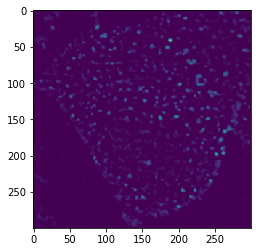

In [60]:
from trackpy.preprocessing import bandpass
import matplotlib.pyplot as plt
test = bandpass(f[0], 1, 15, 1)
plt.imshow(test)

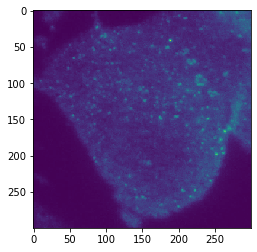

In [62]:
from skimage.restoration import denoise_wavelet
plt.imshow(denoise_wavelet(f[0], multichannel=False))